# Welcome to the AUB Robotics Club Intro to Computer Vision Workshop

####Malek Itani



---



---


### The basics

OpenCV Images are stored as matrices. You can use cv2.imshow() to display an image on to the screen. In Google Collab, we need to use cv2_imshow instead.


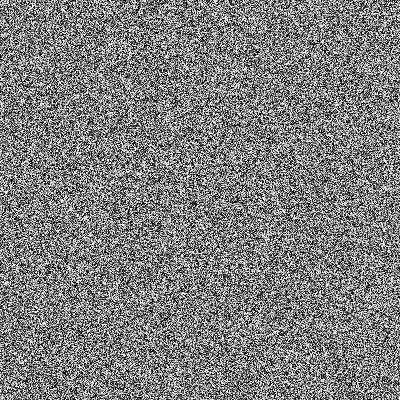

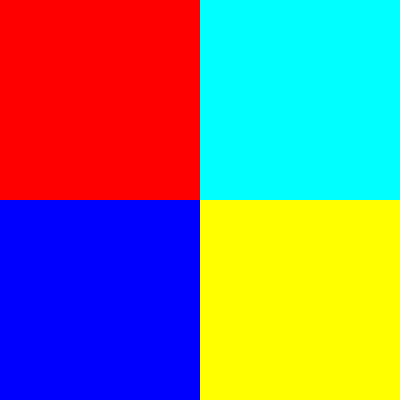

In [ ]:
# Import OpenCV and NumPy
import numpy as np
import cv2
# Use this to show images on google colab
from google.colab.patches import cv2_imshow

height = 400
width = 400

random_bw = np.random.randint(0, 255, (height,width))
colored = np.zeros((height, width, 3))
colored[0:height//2,0:width//2] = (0,0,255)
colored[0:height//2, width//2:] = (255,255,0)
colored[height//2:,0:width//2] = (255,0,0)
colored[height//2:,width//2:] = (0,255,255)

# *** If you were running this on your machine, you would use cv2.imshow("Window Title", mat) instead ***
cv2_imshow(random_bw)
cv2_imshow(colored)

In [ ]:
# Download workshop material

!curl -L -o workshop_material.zip "https://docs.google.com/uc?export=download&id=1q3Pg9gNCA7iwNwyqaM76TvBcpA3QNaSJ"
!unzip workshop_material.zip

!ls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0    472      0 --:--:-- --:--:-- --:--:--   472
100  733k  100  733k    0     0   644k      0  0:00:01  0:00:01 --:--:--  644k
Archive:  workshop_material.zip
replace Cascades/Creeper.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Cascades/Creeper.jpg    
  inflating: Cascades/eyes.xml       
 extracting: Cascades/Einstein.jpg   
  inflating: Cascades/Spiderman.jpg  
  inflating: Cascades/Faces.jpg      
  inflating: Cascades/haarcascade_frontalface_default.xml  
  inflating: images/Glasses.jpg      
  inflating: images/Banana.jpg       
  inflating: images/Mario.jpg        
  inflating: images/Mountain Bikers.jpeg  
  inflating: images/Pineapple.jpeg   
  inflating: images/Mountain.jpg     
Cascades  images  sample_data  workshop_material.zip


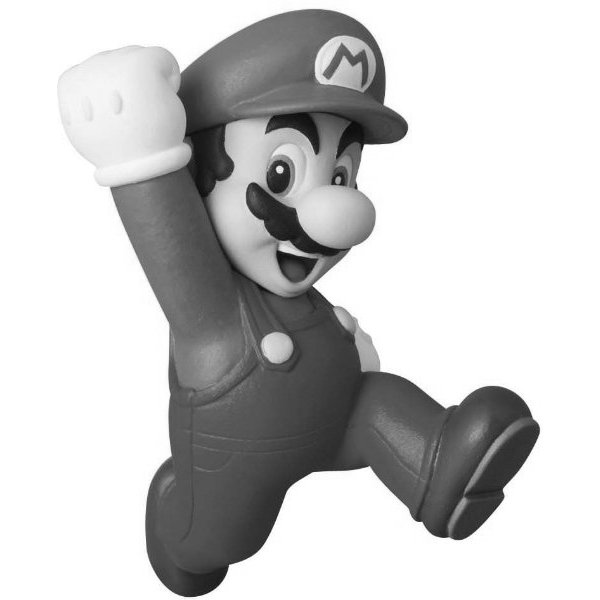

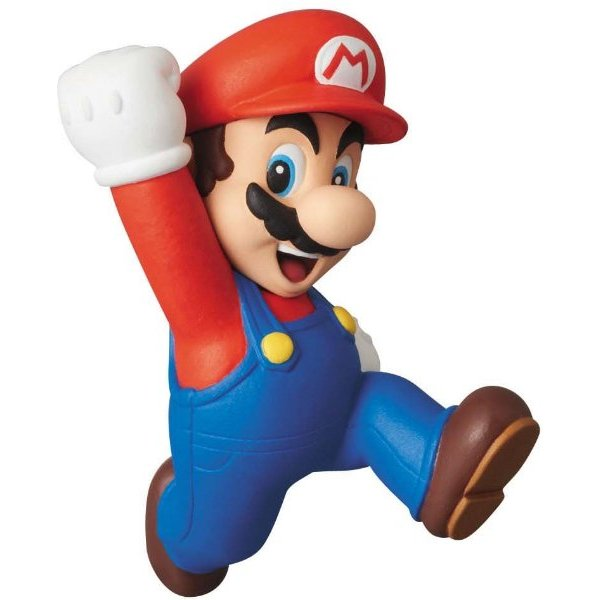

In [ ]:
# Read images from disk
gray = cv2.imread("images/Mario.jpg", cv2.IMREAD_GRAYSCALE)
color = cv2.imread("images/Mario.jpg", cv2.IMREAD_COLOR)

# Show images
cv2_imshow(gray)
cv2_imshow(color)

### Image Blurring

Blurring can be achieved using a variety of different kernels. 
The simplest kernel just replaces a cell with the average of the cells surrounding it. For a 3x3 kernel:

$
K = \frac{1}{9}
\left(
\begin{matrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{matrix}
\right)
$

Try blurring the image you read above:



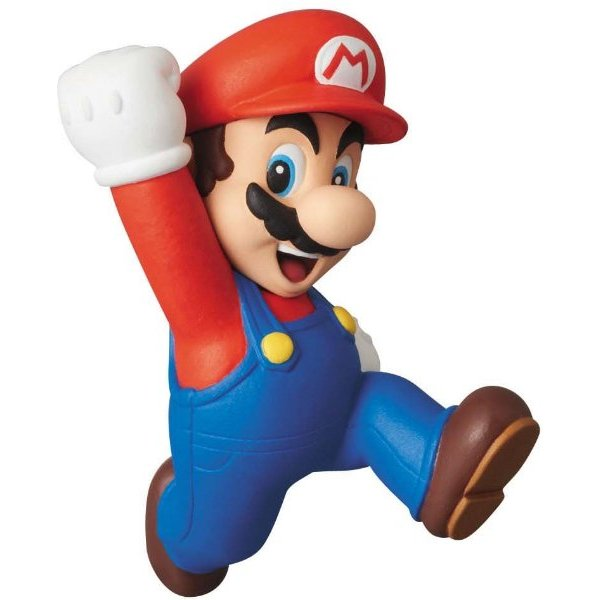

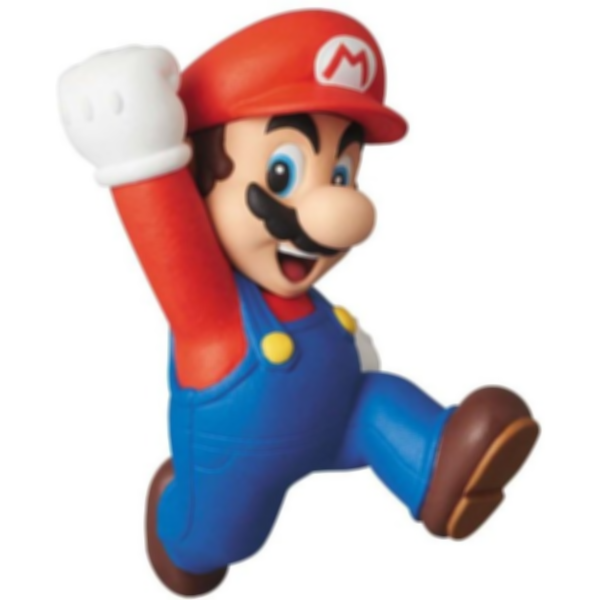

In [ ]:
N = 5
kernel = 1/N**2 * np.ones((N,N))# What is your kernel?

result = cv2.filter2D(color, -1, kernel) # Perform convolution using cv2.filter2D(src, ddepth, kernel)

cv2_imshow(color)
cv2_imshow(result)

## More on Blurring

In general, OpenCV provide you with functions to do common operations. Blurring is one of these operations.

There exists other kernels for blurring. For example, sometimes it is benefitial to weigh pixels closer to the center higher than the ones farther away. One example of is called Gaussian Blurring:
```
cv2.GaussianBlur(img, kernel_shape, std_devX, std_devY)
```

Instead of taking a weighted sum, we can take the median of all pixel values. This is called median blurring:
```
cv2.medianBlur(img, kernel_size)
```

OpenCV provides other types of blurring techniques, some can get pretty mathy. Not all blurring methods are the same. For example, some types of blurs perform really well, but are slow. This might not be optimal for you, but it depends on the application. 

Try some of these functions, and note their differences.

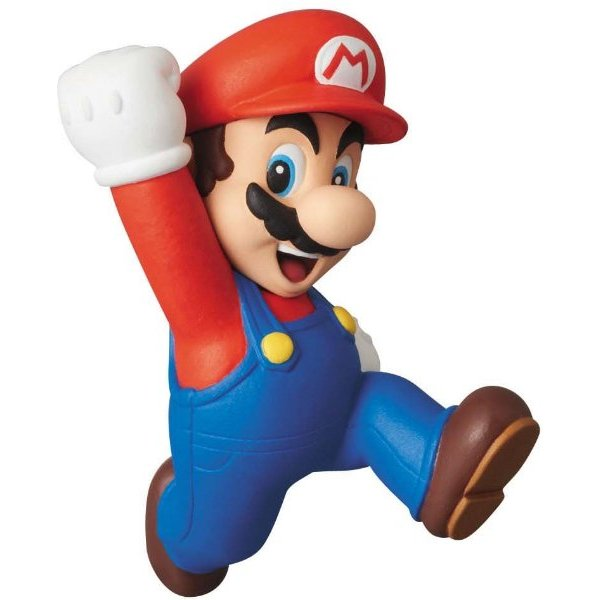

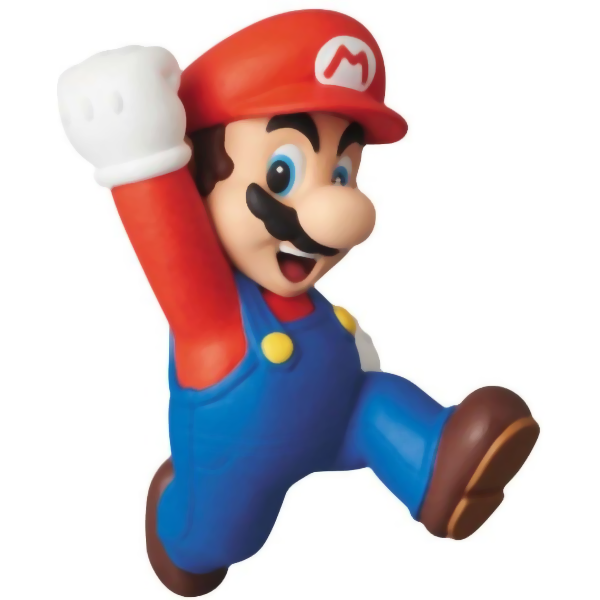

In [ ]:
result = cv2.medianBlur(color, 7) # Try some of these blurring functions on the image

cv2_imshow(color)
cv2_imshow(result)

### Thresholding

It is often useful to zero out all parts of an image above or below a certain value. This is called thresholding. OpenCV implements two kinds of thresholding: Global and Adaptive.

In global thresholding, all pixels are treated equally and threshold values are fixed.
```
cv2.threshold(img, lowerlimit, upperlimit, mode)
```

In adaptive thresholding, threshold values can be modified based on the surrounding pixels. For regions with brighter pixels, the thresholds might increase because the light might make features brighter than what they should be.
```
cv2.adaptiveThreshold(img, upperlimit, method, type, blocksize, c) 
```

Additionally, OpenCV also provides Otsu thresholding, in which an optimal value is selected based on the distribution of pixel values.
```
cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
```


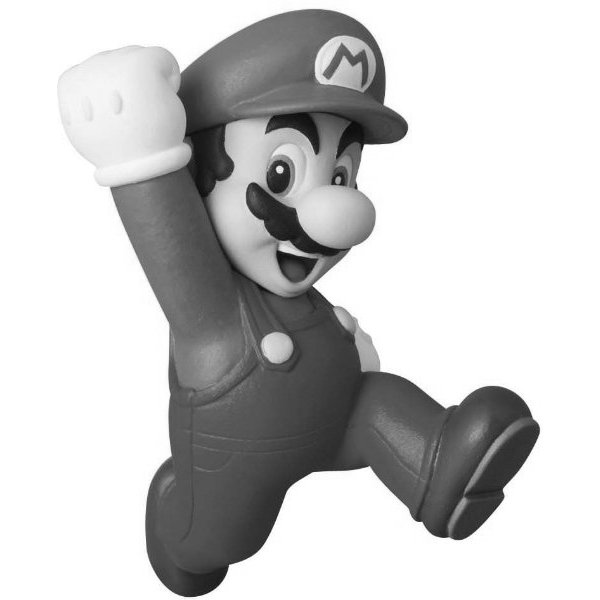

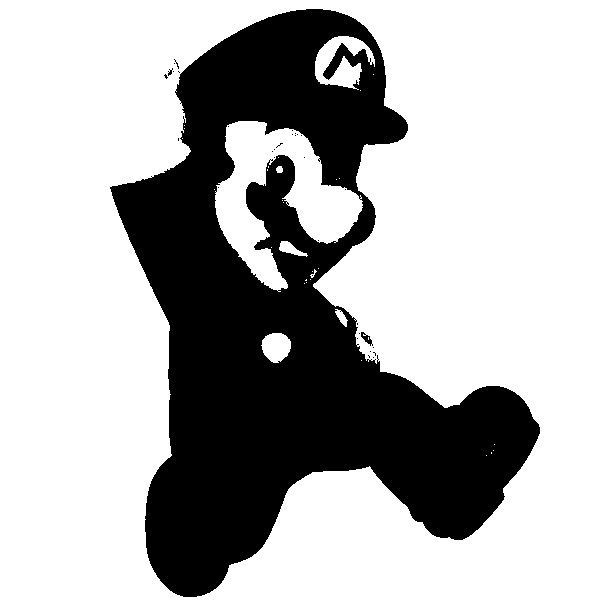

In [ ]:
ret, result = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) # Try some of thresholding the gray image at different values

cv2_imshow(gray)
cv2_imshow(result)

### Image Gradients

Image Gradients give you the regions where the values of the pixels change rapidly. This is useful to find features like edges or corners.

In OpenCV, you can obtain an image gradient using:
```
cv2.Laplacian(img,cv2.CV_8U)
```



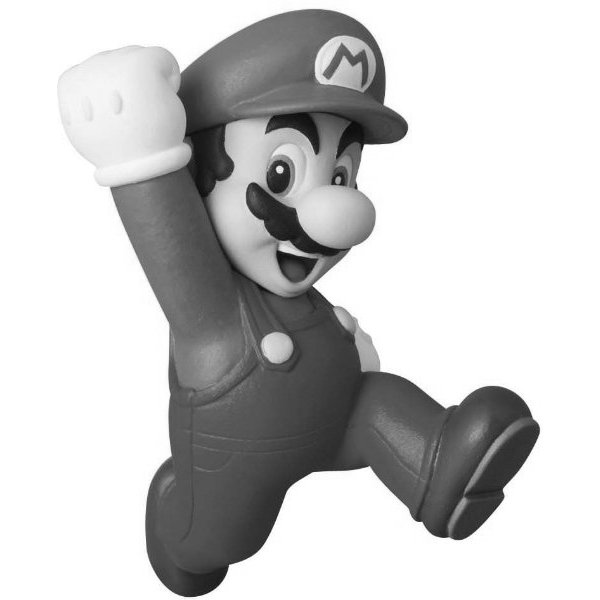

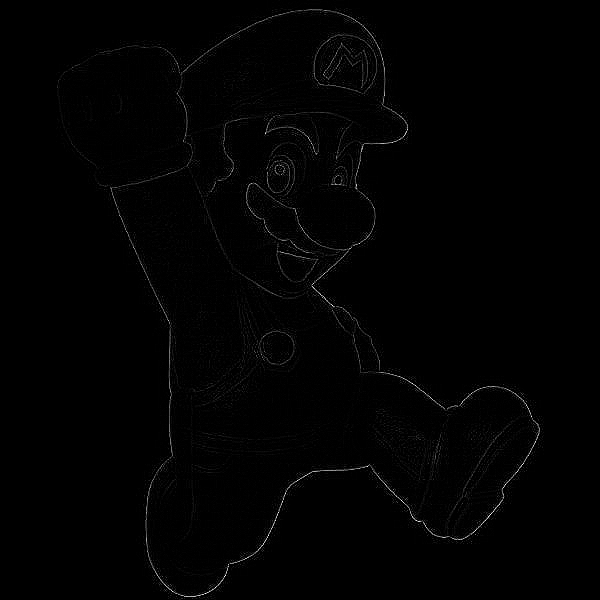

In [ ]:
result = cv2.Laplacian(gray,cv2.CV_8U)# Compute the laplacian to find the image gradient

cv2_imshow(gray)
cv2_imshow(result)

### Color Spaces and Isolation

Colors can be represented in different ways, called color spaces. Two of these are BGR and Grayscale, which are what you've been using for now. Other spaces include HSV, LAB, BGRA and many more.

The HSV color space is especially interesting to use because it is more robust to changes in light levels.

To convert between color spaces in OpenCV, you use:

```
cv2.cvtColor(img, code)
```

Sometimes it is useful to only consider parts of your image that are of a certain color. For example, if you have a robot trying to track a red ball, you can just eliminate everything that isn't red and find the centroid of the remaining pixels.

To do this, you can use:
```
cv2.inRange(img, lowerRange, upperRange)
```
This works for any color space, it returns a black and white image. The image is white (value 255) where pixels belong to a certain range, and it will give black (value 0) where pixels are outside a range.



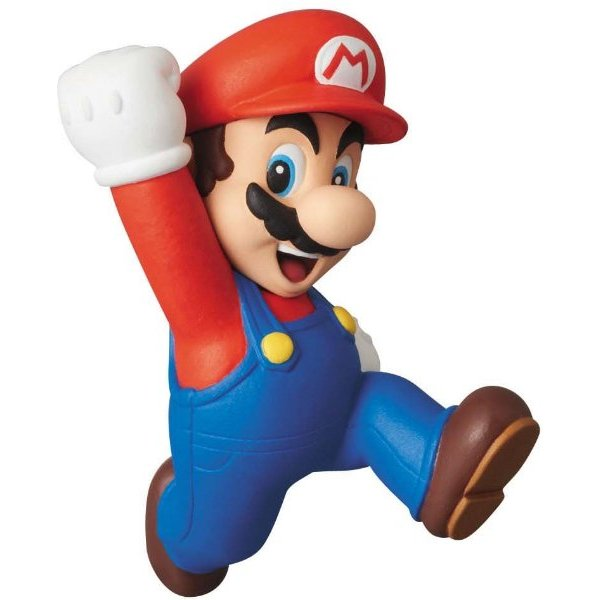

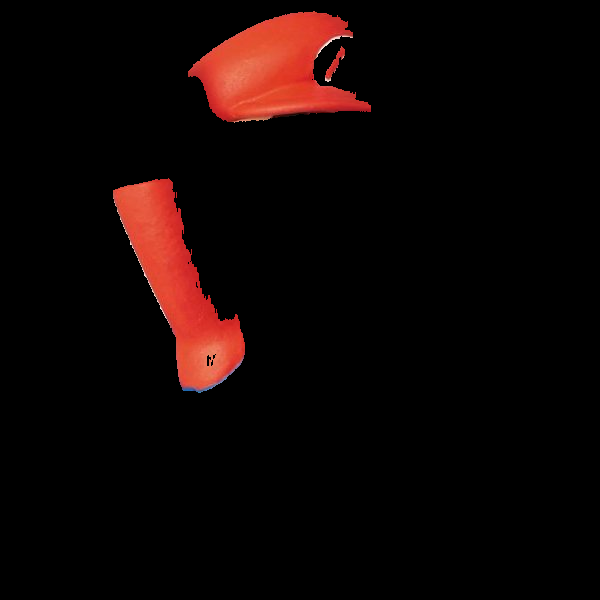

In [ ]:
lower_limit = (0, 155, 200) # Define your lower limit
upper_limit = (10, 255, 255)# Define your lower limit

hsv_img = cv2.cvtColor(color, cv2.COLOR_BGR2HSV)# Convert the image to hsv

mask = cv2.inRange(hsv_img, lower_limit, upper_limit) # Obtain a mask of the image for pixels that belong to the range

mask = cv2.dilate(mask,(5,5),iterations=5)

result = cv2.bitwise_and(color, color, mask=mask)# Use the mask to hide bad pixels from the original image

cv2_imshow(color)
cv2_imshow(result)

### Morphological Operations

Morphological operations are operations that modify images based on a given shape. This is done by choosing an appropriate kernel. Some of the morphological operations supported by OpenCV are:

Dilation - Grows a region of an image.
```
cv2.dilate(img,kernel_shape,iterations)
```

Erosion - Shrinks a region of an image.
```
cv2.erode(img,kernel_shape,iterations)
```

There are other operations as well, such as Closing, Opening, Top Hat and Black Hat. These are accessed using:
```
cv2.MorphologyEx(img, type, kernel_shape) 
```

A good idea is to do this on the mask that was obtained in the previous section. Sometimes, small objects that fit our range may be considered part of the object we're tracking. We don't want this, so it's a good idea to do closing. We can also dilate once we've close to make up for the shrinkage that closing will cause on our actual object.


### Face detection with Haar-like features and the Viola-Jones Algorithm

This algorithm makes use of a specific set of features in order to detect an object in a given scene. These features are extracted from a large number of sample images and compiled into a single XML file. Then, a model is trained to look for these features in an image.

A common application of this is face detection. An XML for facial features can be found online, and we only need to feed it to an OpenCV cascade classifier and use it to detect faces in our images.
```
cascade = cv2.CascadeClassifier(pathToXML)
locations = cascade.detectMultiScale(img, weight, numNeighbours)
```
This will give you a set of bounding rectangles to go over, which represent regions where a positive detection is found.


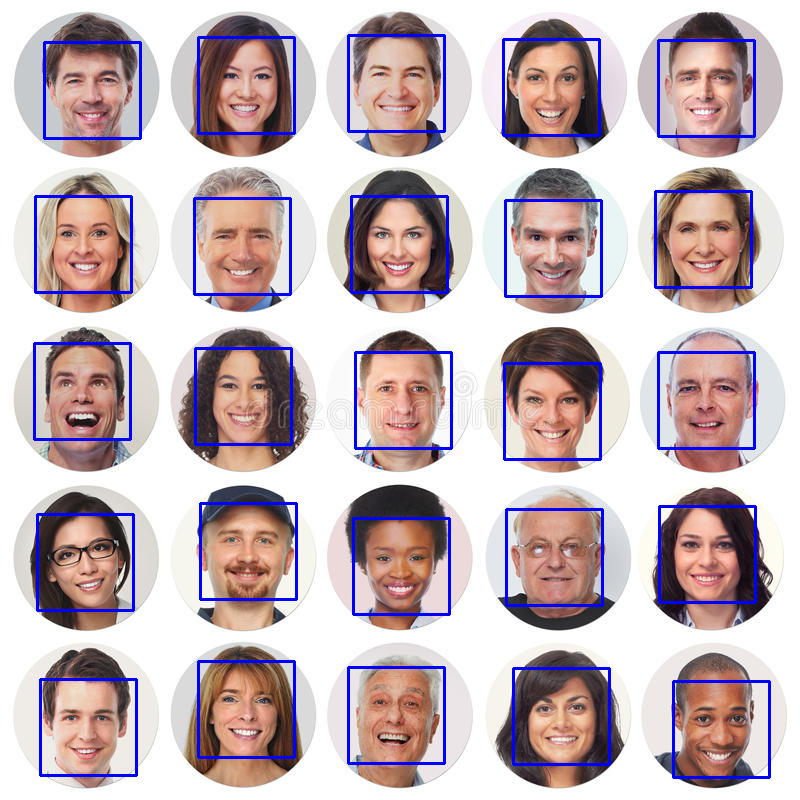

In [ ]:
face_cascade = cv2.CascadeClassifier("Cascades/haarcascade_frontalface_default.xml")# Create the cascade classifier

img = cv2.imread("Cascades/Faces.jpg")# Read the Faces.jpg from the Cascades folder.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert the image to grayscale

# creeper = cv2.imread("Cascades/Creeper.jpg")

faces = face_cascade.detectMultiScale(gray, 4, 3)# Detect faces in the image
for (x,y,w,h) in faces:
  # Draw rectangles over all the faces on img
  # img[x:x+w, y:y+h] = imutils.resize(creeper, w, h)
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

cv2_imshow(img)


In [ ]:
import imutils